<a href="https://colab.research.google.com/github/brinda-lax/brinda-lax/blob/main/Alzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading data

In [ ]:
alzheimers_data=pd.read_csv('/content/sample_data/alzheimers_disease_patient_data.csv')
alzheimers_data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


#dataset info like its data types and non null count

In [ ]:
alzheimers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
alzheimers_describe=alzheimers_data.describe()
alzheimers_describe

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


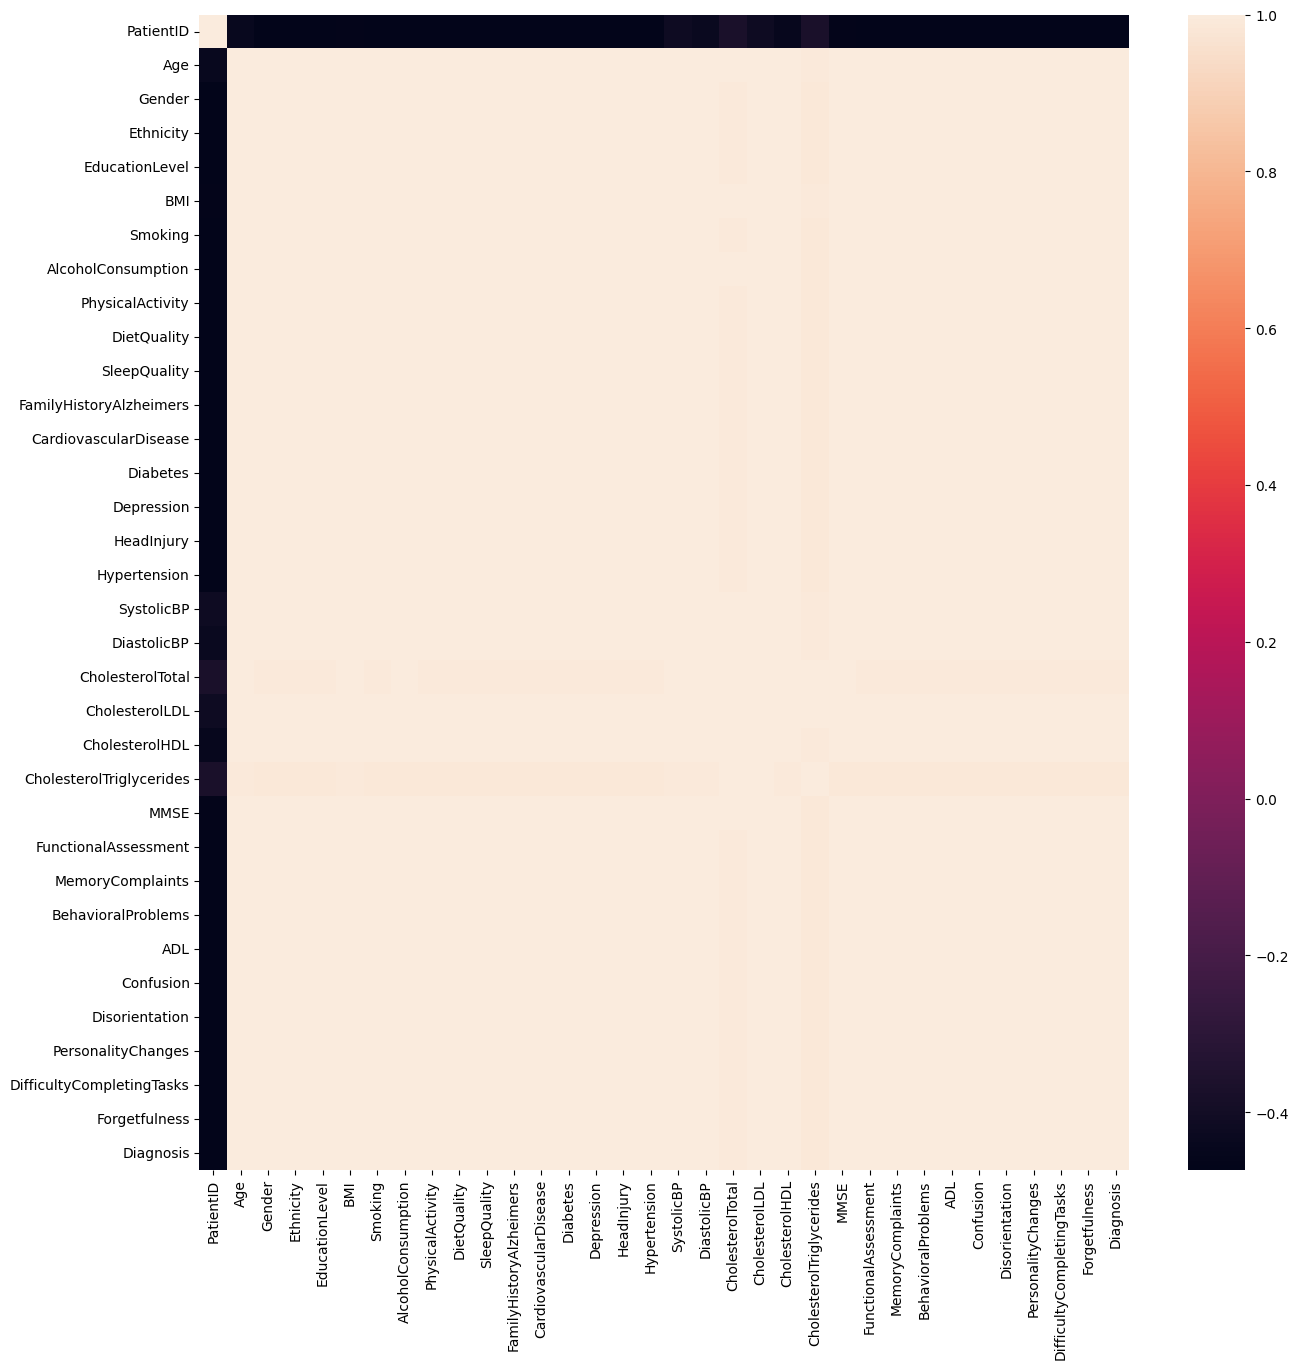

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(alzheimers_describe.corr(),fmt='.2f')
plt.show()

#Index

In [ ]:
alzheimers_data.index

RangeIndex(start=0, stop=2149, step=1)

In [ ]:
alzheimers_data.duplicated().sum()

0

#Alzheimers by age

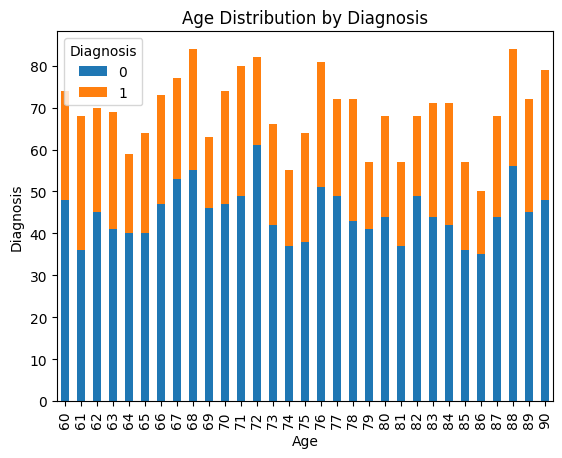

In [ ]:
alzheimers_age_diagnosis=alzheimers_data.groupby('Age')['Diagnosis'].value_counts().unstack()
alzheimers_age_diagnosis.plot(kind='bar' ,stacked=True)
plt.xlabel('Age')
plt.ylabel('Diagnosis')
plt.title('Age Distribution by Diagnosis')
plt.show()


In [ ]:
alzheimers_ethnicity=alzheimers_data['Ethnicity'].describe()
alzheimers_ethnicity


,Ethnicity
count,2149.000000
mean,0.697534
std,0.996128
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


#Alzheimers by ethnicity

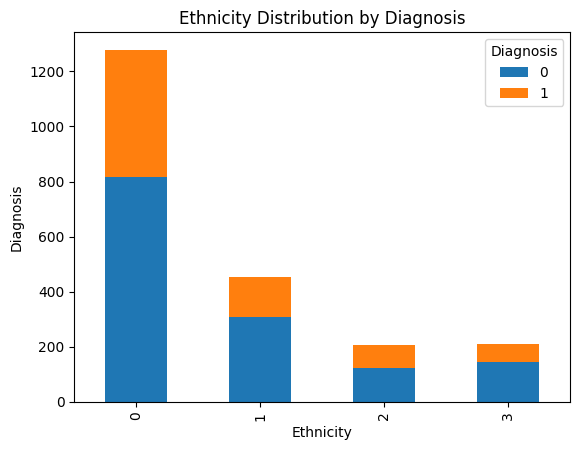

In [ ]:
alzheimers_ethnicity_count=alzheimers_data.groupby('Ethnicity')['Diagnosis'].value_counts().unstack()
alzheimers_ethnicity_count.plot(kind='bar',stacked=True)
plt.xlabel('Ethnicity')
plt.ylabel('Diagnosis')
plt.title('Ethnicity Distribution by Diagnosis')
plt.show()

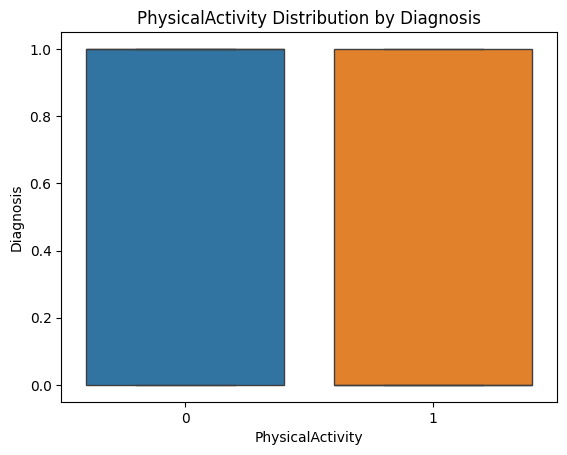

In [ ]:
physical=alzheimers_data.groupby('PhysicalActivity')['Diagnosis'].value_counts().unstack()
physical.fillna(0,inplace=True)
sns.boxplot(data=physical)
plt.xlabel('PhysicalActivity')
plt.ylabel('Diagnosis')
plt.title('PhysicalActivity Distribution by Diagnosis')
plt.show()


#Alzheimers by smoke

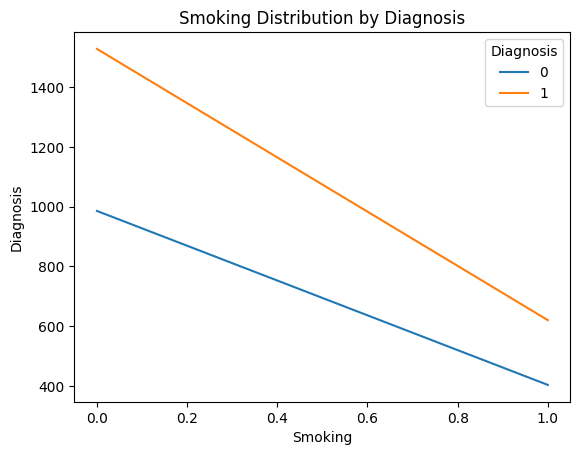

In [ ]:
alzheimer_smoke=alzheimers_data.groupby('Smoking')['Diagnosis'].value_counts().unstack()
alzheimer_smoke.plot(kind='line',stacked=True)
plt.xlabel('Smoking')
plt.ylabel('Diagnosis')
plt.title('Smoking Distribution by Diagnosis')
plt.show()


#Piechart for smoking

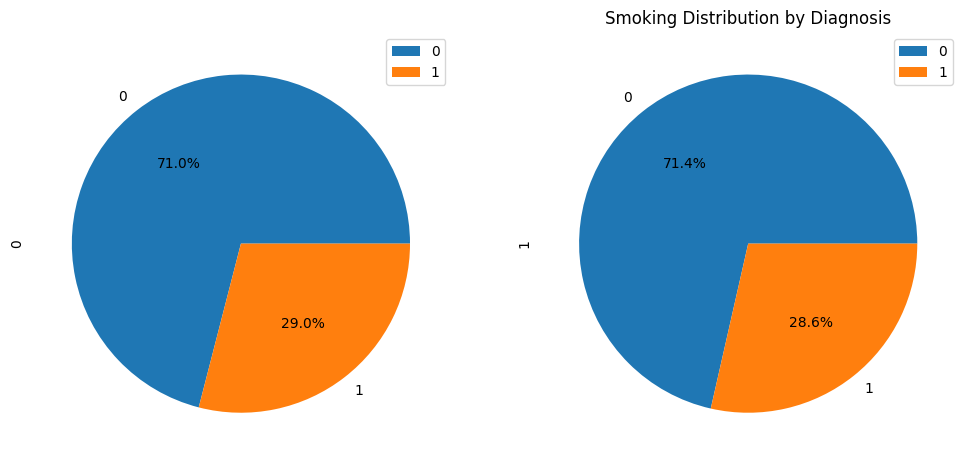

In [ ]:
alzheimer_smoke.plot(kind='pie',autopct='%1.1f%%',figsize=(12,8),subplots=True)
plt.title('Smoking Distribution by Diagnosis')
plt.show()

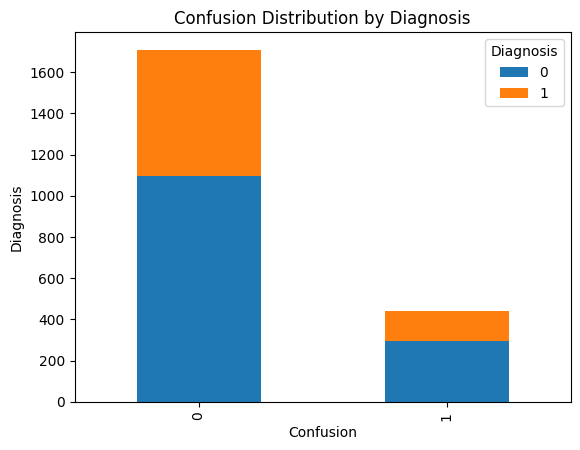

In [ ]:
alzheimer_confusion=alzheimers_data.groupby('Confusion')['Diagnosis'].value_counts().unstack()
alzheimer_confusion.plot(kind='bar',stacked=True)
plt.xlabel('Confusion')
plt.ylabel('Diagnosis')
plt.title('Confusion Distribution by Diagnosis')
plt.show()